In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree as tr
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [ ]:
cancer = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/breast-cancer.csv')

In [ ]:
y = cancer['diagnosis'].map({'B': 0, 'M': 1})
x = cancer.drop(columns=['id', 'diagnosis'], axis=1)
feature_names = x.columns

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=35)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=35)

In [ ]:
tree = DecisionTreeClassifier(criterion="gini", max_depth=3)
model = tree.fit(x_train, y_train)


In [ ]:
validation_accuracy = model.score(x_val, y_val) * 100
test_accuracy = model.score(x_test, y_test) * 100
cv_scores = cross_val_score(model, x, y, cv=5)
predicted_values = tree.predict(x_test)
mean_accuracy = cv_scores.mean() * 100

In [ ]:
print()
print("Average Accuracy:", mean_accuracy)
print("Validation Accuracy:", validation_accuracy)
print("Test Accurancy: ", test_accuracy)
print()
print(classification_report(y_test, predicted_values))


Average Accuracy: 91.73575531749728
Validation Accuracy: 95.6140350877193
Test Accurancy:  95.6140350877193

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        73
           1       0.95      0.93      0.94        41

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



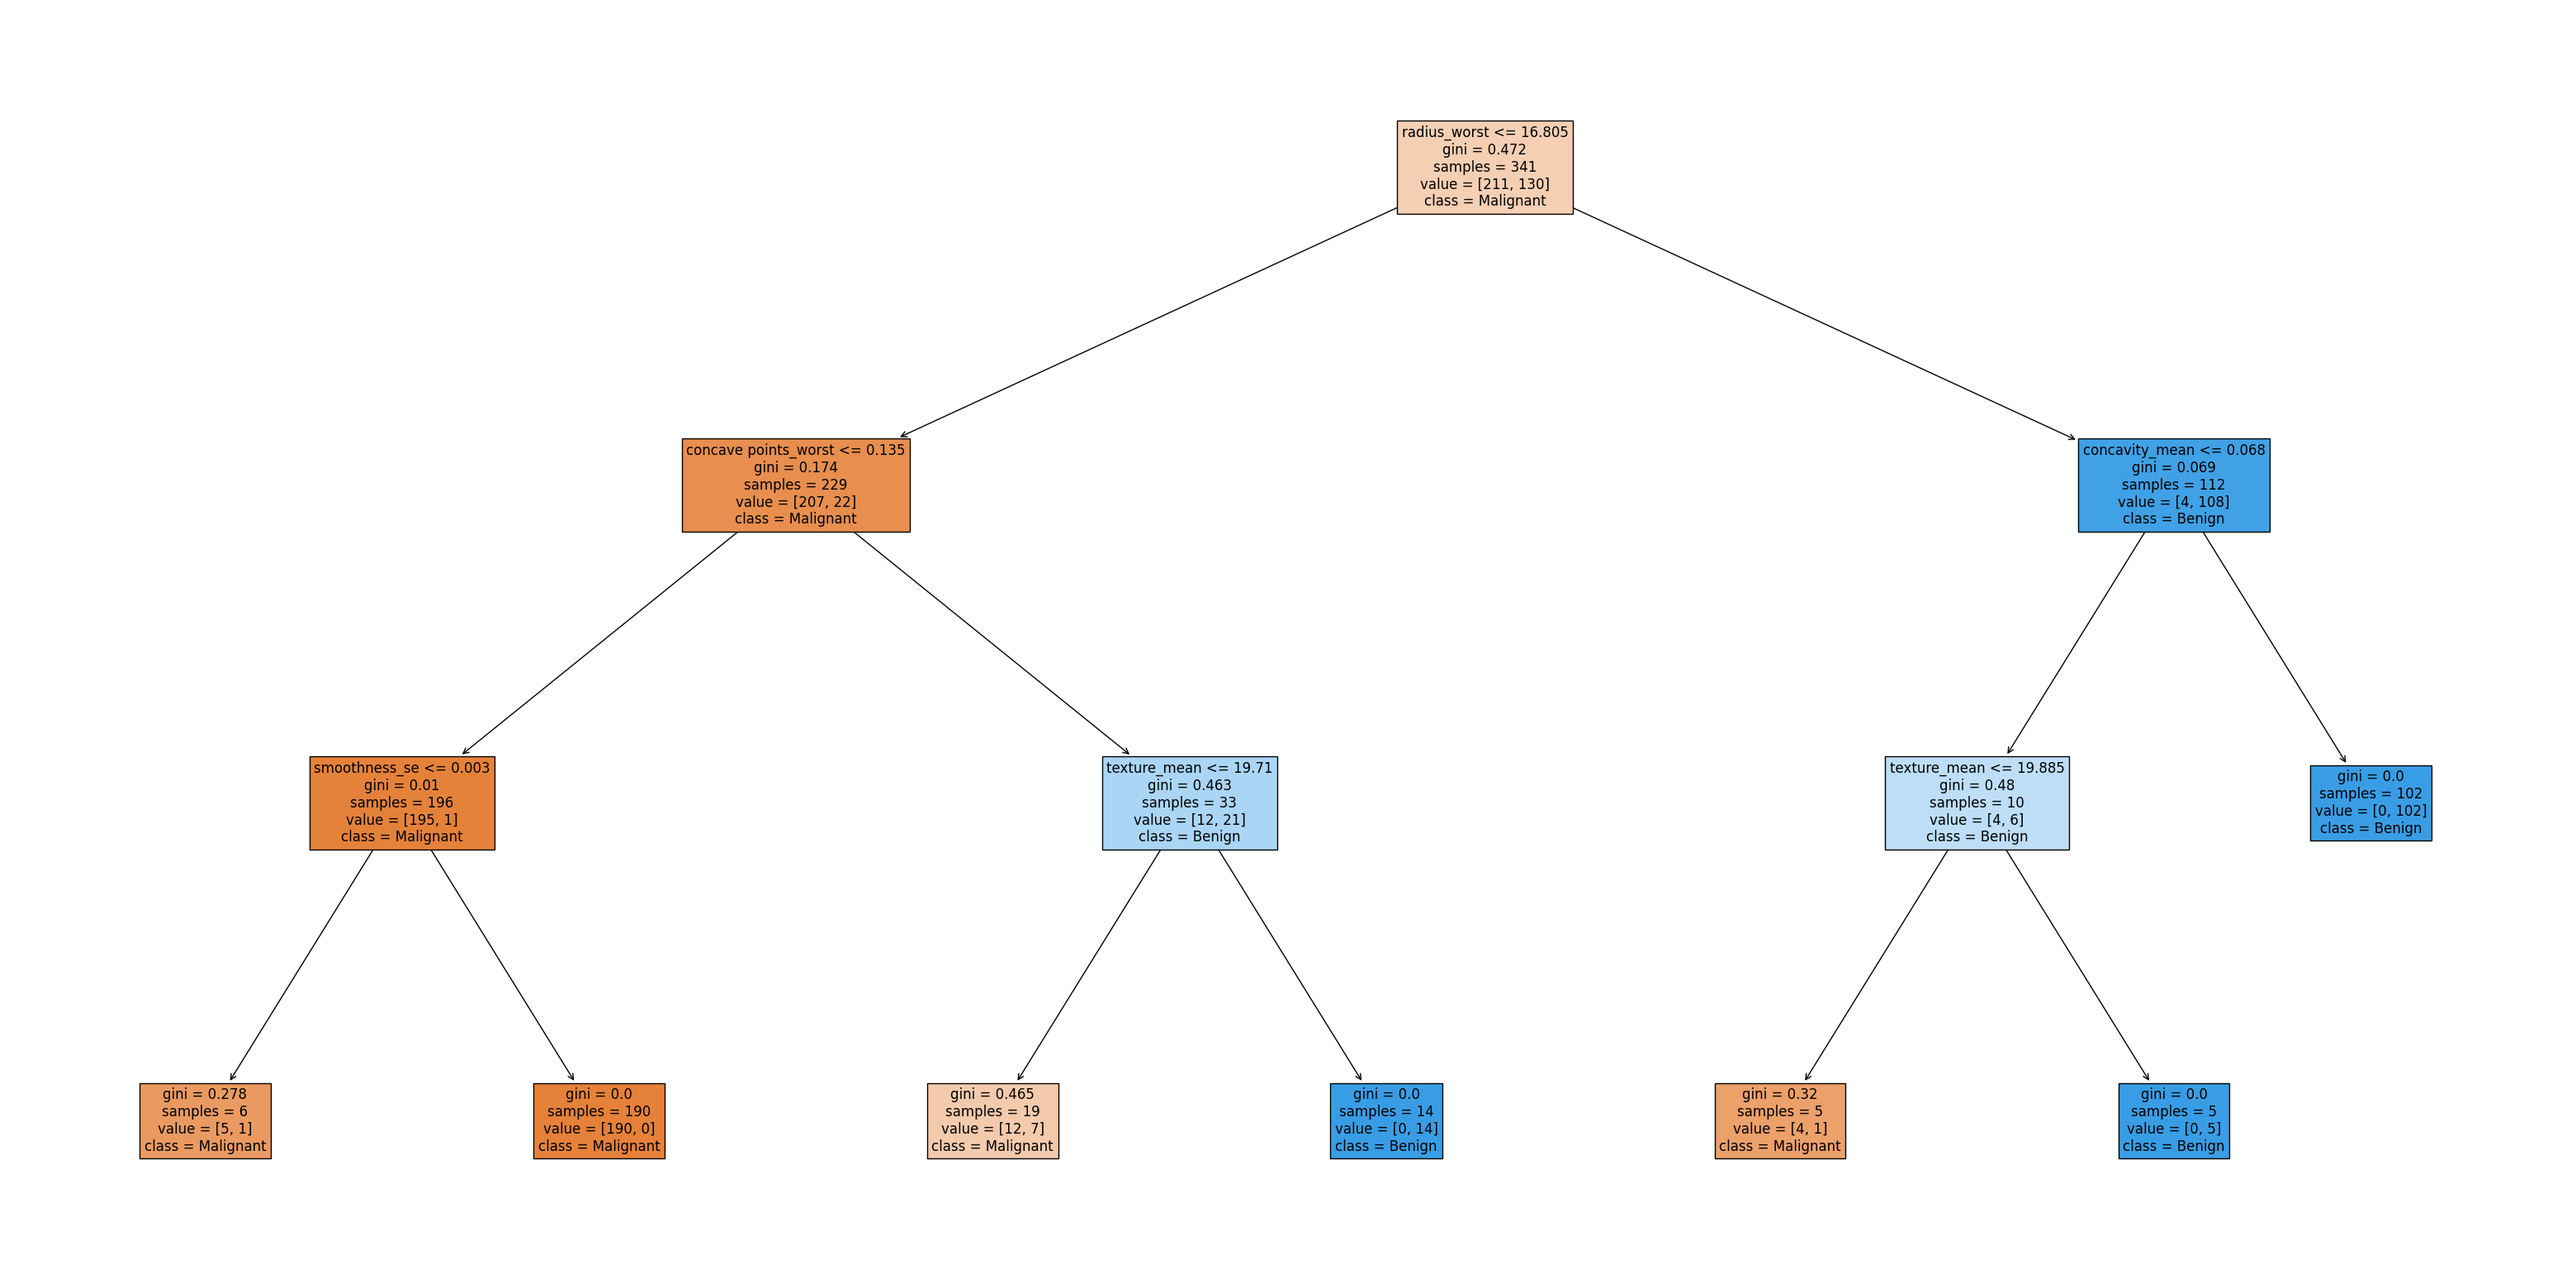

In [ ]:
# Plot Tree

fig = plt.figure(figsize=(40, 20))
_ = tr.plot_tree(model,
       feature_names=feature_names,
       class_names={0: 'Malignant', 1: 'Benign'},
       filled=True,
       fontsize=12)
plt.show()

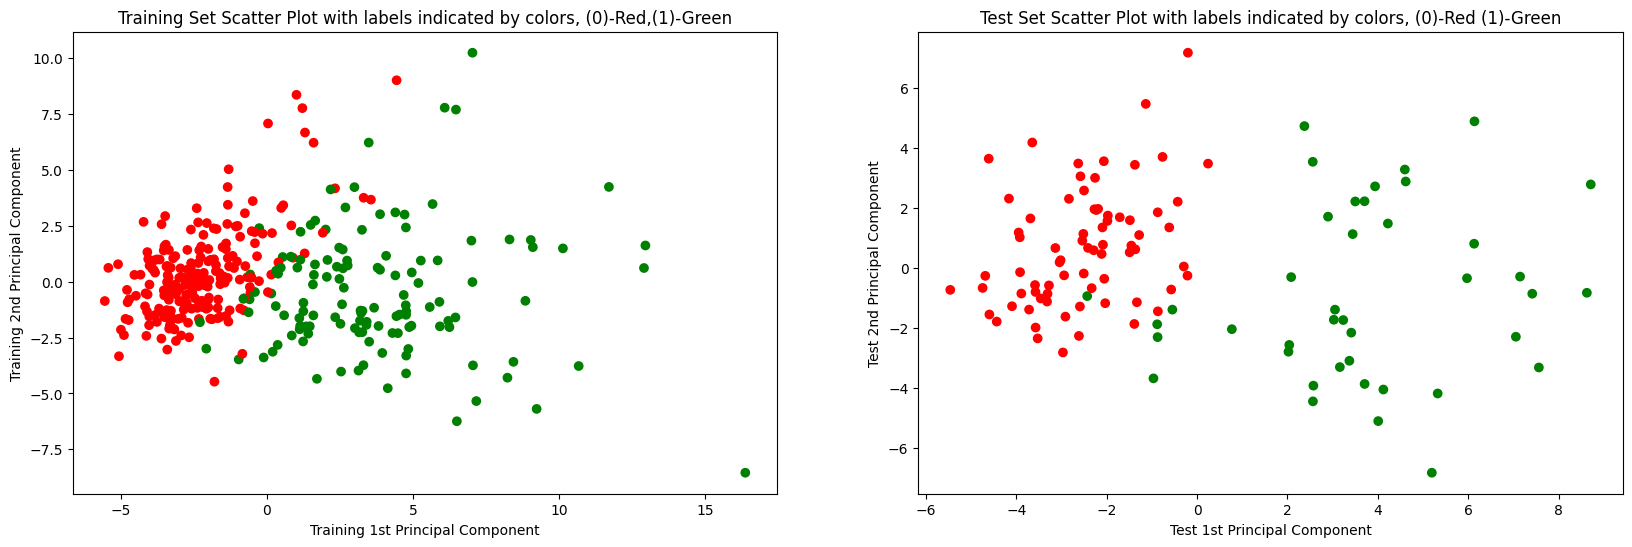

In [ ]:

scalerx = StandardScaler()
x_train_scaled = scalerx.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled, columns = feature_names)

x_test_scaled = scalerx.transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = feature_names)

pca = IncrementalPCA(n_components = 2)
x_train_pca = pca.fit_transform(x_train_scaled)

x_test_pca = pca.transform(x_test_scaled)

plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.scatter(x_train_pca[:,0], x_train_pca[:,1], c=y_train.map({0: 'red', 1: 'Green'}))
plt.xlabel('Training 1st Principal Component')
plt.ylabel('Training 2nd Principal Component')
plt.title('Training Set Scatter Plot with labels indicated by colors, (0)-Red,(1)-Green')
plt.subplot(1, 2, 2)
plt.scatter(x_test_pca[:,0], x_test_pca[:,1], c = y_test.map({0: 'Red', 1: 'Green'}))
plt.xlabel('Test 1st Principal Component')
plt.ylabel('Test 2nd Principal Component')
plt.title('Test Set Scatter Plot with labels indicated by colors, (0)-Red (1)-Green')
plt.show()


In [ ]:
params = {'C':[0.01, 0.1, 1, 10, 100]}

clf = LogisticRegression()

folds = 5
model_cv = GridSearchCV(estimator = clf, 
                        param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds,
                        return_train_score=True,
                        verbose = 3)

model_cv.fit(x_train_pca, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ........C=0.01;, score=(train=0.908, test=0.942) total time=   0.0s
[CV 2/5] END ........C=0.01;, score=(train=0.934, test=0.912) total time=   0.0s
[CV 3/5] END ........C=0.01;, score=(train=0.923, test=0.912) total time=   0.0s
[CV 4/5] END ........C=0.01;, score=(train=0.927, test=0.882) total time=   0.0s
[CV 5/5] END ........C=0.01;, score=(train=0.930, test=0.926) total time=   0.0s
[CV 1/5] END .........C=0.1;, score=(train=0.930, test=0.928) total time=   0.0s
[CV 2/5] END .........C=0.1;, score=(train=0.949, test=0.912) total time=   0.0s
[CV 3/5] END .........C=0.1;, score=(train=0.923, test=0.941) total time=   0.0s
[CV 4/5] END .........C=0.1;, score=(train=0.934, test=0.897) total time=   0.0s
[CV 5/5] END .........C=0.1;, score=(train=0.938, test=0.926) total time=   0.0s
[CV 1/5] END ...........C=1;, score=(train=0.930, test=0.942) total time=   0.0s
[CV 2/5] END ...........C=1;, score=(train=0.949,

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, return_train_score=True,
             scoring='accuracy', verbose=3)

In [ ]:
print(model_cv.best_params_)

{'C': 10}


In [ ]:
model = LogisticRegression(C = 10).fit(x_train_pca, y_train)

In [ ]:
y_train_pred = model.predict(x_train_pca)
y_test_pred = model.predict(x_test_pca)

In [ ]:

print('Training Accuracy of the Model: ', metrics.accuracy_score(y_train, y_train_pred) * 100)
print('Test Accuracy of the Model: ', metrics.accuracy_score(y_test, y_test_pred) * 100)
print()

print('Training Precision of the Model: ', metrics.precision_score(y_train, y_train_pred) * 100)
print('Test Precision of the Model: ', metrics.precision_score(y_test, y_test_pred) * 100)
print(classification_report(y_test, y_test_pred))

Training Accuracy of the Model:  93.841642228739
Test Accuracy of the Model:  97.36842105263158

Training Precision of the Model:  92.91338582677166
Test Precision of the Model:  100.0
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        73
           1       1.00      0.93      0.96        41

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                np.arange(y_min, y_max, 0.1))

Z_train = model.predict(np.c_[xx_train.ravel(), yy_train.ravel()])

Z_train = Z_train.reshape(xx_train.shape)

x_min, x_max = x_test_pca[:, 0].min() - 1, x_test_pca[:, 0].max() + 1
y_min, y_max = x_test_pca[:, 1].min() - 1, x_test_pca[:, 1].max() + 1

xx_test, yy_test = np.meshgrid(np.arange(x_min, x_max, 0.1),
                              np.arange(y_min, y_max, 0.1))

Z_test = model.predict(np.c_[xx_test.ravel(), yy_test.ravel()])

Z_test = Z_test.reshape(xx_test.shape)

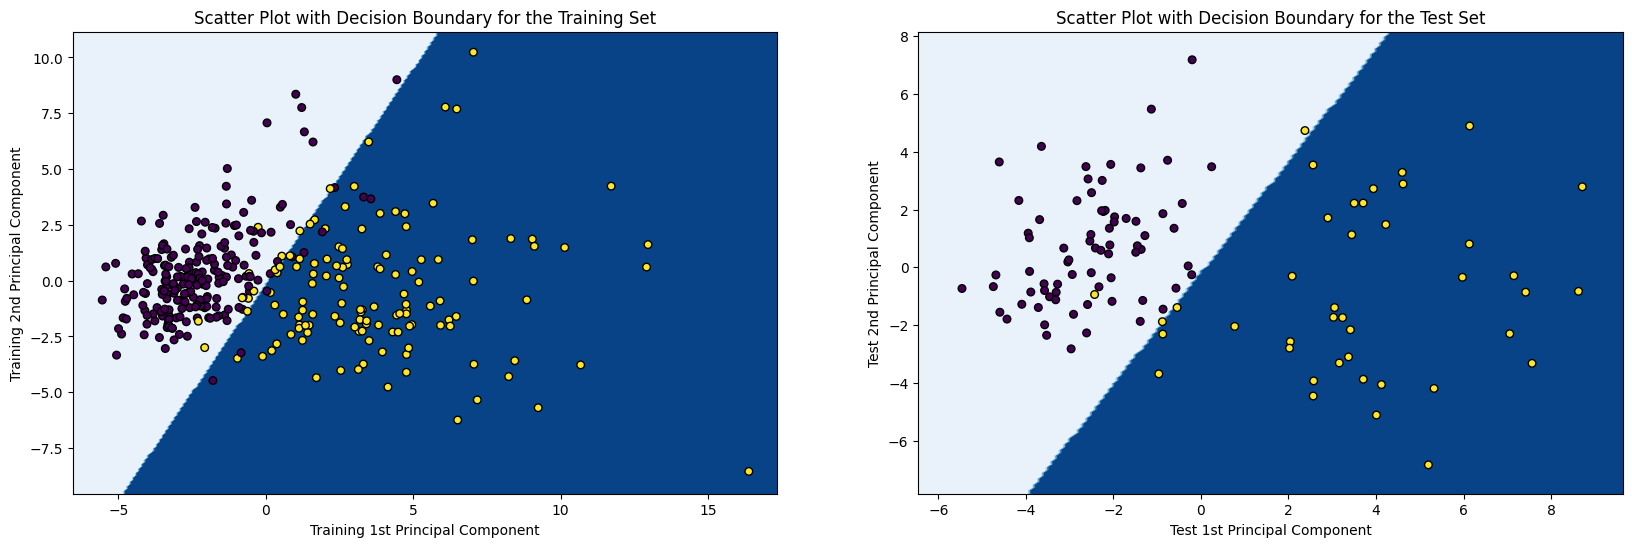

In [ ]:
plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.contourf(xx_train, yy_train, Z_train, cmap='Blues')
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c = y_train, s = 30, edgecolor = 'k')
plt.xlabel('Training 1st Principal Component')
plt.ylabel('Training 2nd Principal Component')
plt.title('Scatter Plot with Decision Boundary for the Training Set')
plt.subplot(1, 2, 2)
plt.contourf(xx_test, yy_test, Z_test, cmap='Blues')
plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c = y_test, s = 30, edgecolor = 'k')
plt.xlabel('Test 1st Principal Component')
plt.ylabel('Test 2nd Principal Component')
plt.title('Scatter Plot with Decision Boundary for the Test Set')
plt.show()